# Homework: Decision Tree
## Classification with scikit-learn
***

## Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


## Load Dataset (CSV file)

In [60]:
dataset = pd.read_csv('../Data/Decision_Tree_Dataset.csv', sep = ',', header = 0)
dataset.head(8)

,Result,Initial payment,Last payment,Credit Score,House Number
0,yes,201,10018,250,3046
1,yes,205,10016,395,3044
2,yes,257,10129,109,3251
3,yes,246,10064,324,3137
4,yes,117,10115,496,3094
5,yes,406,10187,166,3068
6,yes,461,10252,172,3062
7,yes,158,10192,144,3469


## Dataset Information

- provide a brief overview of the dataset (use info() )
- What is the nature of the data (e.g., text, numerical, images)?
- How many instances and features does the dataset contain?

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Result           1000 non-null   object
 1   Initial payment  1000 non-null   int64 
 2   Last payment     1000 non-null   int64 
 3   Credit Score     1000 non-null   int64 
 4   House Number     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


As the result shows, the dataset contains **1000** instances and **4** features. The features are all numerical. The first column shows the result of the classification, and the other four columns are the features.

In [62]:
dataset.dtypes

Result             object
Initial payment     int64
Last payment        int64
Credit Score        int64
House Number        int64
dtype: object

- Check for missing values

In [63]:
missing_values = dataset.isnull().sum()
print(missing_values)

Result             0
Initial payment    0
Last payment       0
Credit Score       0
House Number       0
dtype: int64


There are no missing values in the dataset.

Descriptive Statistics:

- Purpose: Summarize and describe the main characteristics of the dataset.
- Techniques: Calculate mean, median, mode, standard deviation, range, and other summary statistics.

In [64]:
# Descriptive Statistics for the initial payment feature
mean_initial_pay = int(np.mean(dataset["Initial payment"]))
median_initial_pay = int(np.median(dataset["Initial payment"]))
std_initial_pay = int(np.std(dataset["Initial payment"]))
max_initial_pay = int(np.max(dataset["Initial payment"]))
min_initial_pay = int(np.min(dataset["Initial payment"]))
mode_pay = dataset["Initial payment"].mode()
mode_pay = mode_pay.sort_values(ascending=False)
range_pay = (min_initial_pay, max_initial_pay) 

print("Descriptive Statistics for the Initial Payment Feature")
print("-" * 60)
print(f"mean: {mean_initial_pay}")
print(f"median: {median_initial_pay}")
print(f"std: {std_initial_pay}")
print(f"range of values: {range_pay}")
print(f"most occuring features: \n{mode_pay.values}")


Descriptive Statistics for the Initial Payment Feature
------------------------------------------------------------
mean: 294
median: 289
std: 115
range of values: (100, 500)
most occuring features: 
[157 128 110]


In [65]:
# Descriptive Statistics for the Credit score feature
mean_credit = int(np.mean(dataset["Credit Score"]))
median_credit = int(np.median(dataset["Credit Score"]))
std_credit = int(np.std(dataset["Credit Score"]))
max_credit = int(np.max(dataset["Credit Score"]))
min_credit = int(np.min(dataset["Credit Score"]))
mode_credit = dataset["Credit Score"].mode()
mode_credit = mode_credit.sort_values(ascending=False)
range_credit = (min_credit, max_credit) 


print("Descriptive Statistics for the Credit score Feature")
print("-" * 60)
print(f"mean: {mean_credit}")
print(f"median: {median_credit}")
print(f"std: {std_credit}")
print(f"range of values: {range_credit}")
print(f"most occuring features: \n{mode_credit.values}")

Descriptive Statistics for the Credit score Feature
------------------------------------------------------------
mean: 528
median: 516
std: 259
range of values: (100, 997)
most occuring features: 
[991 113]


## Visualization

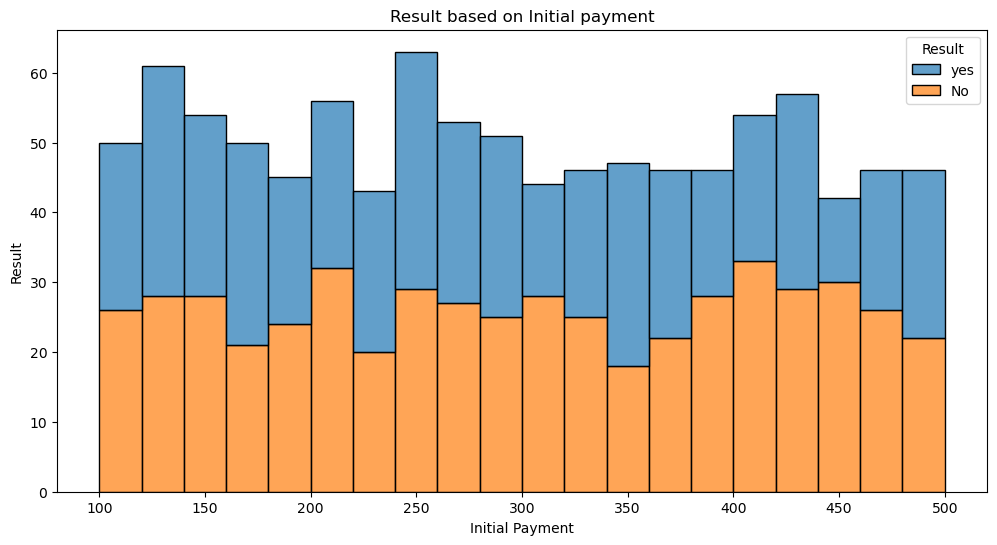

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='Initial payment', hue="Result", multiple='stack', alpha=0.7, bins=20)
plt.title('Result based on Initial payment')
plt.xlabel('Initial Payment')
plt.ylabel('Result')
plt.show()

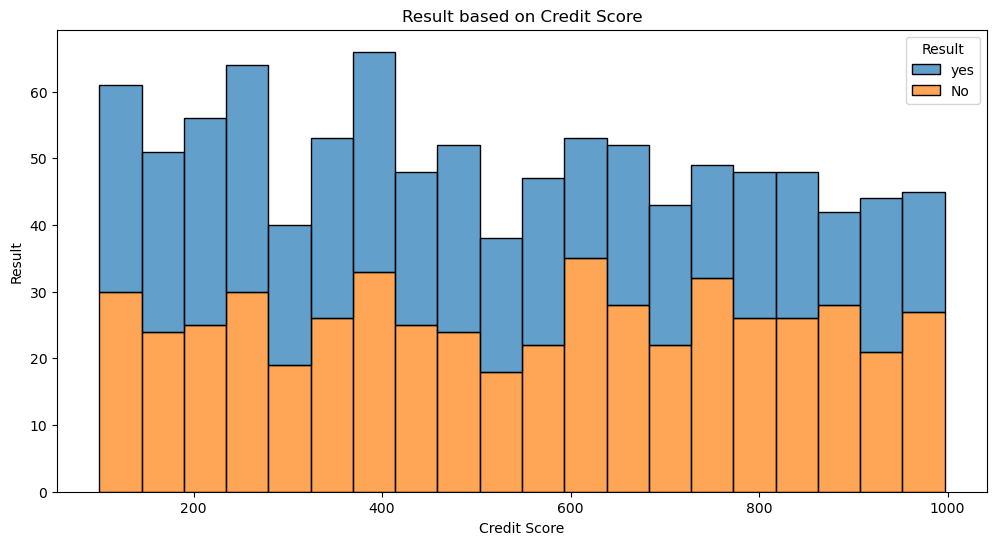

In [67]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='Credit Score', hue="Result", multiple='stack', alpha=0.7, bins=20)
plt.title('Result based on Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Result')
plt.show()

## Model Building

In [68]:
# Separating the target variable
X = dataset[["Credit Score", "Initial payment", "Last payment", "House Number"]]  # features
y = dataset["Result"]  # target variable

In [69]:
# Splitting dataset in to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [70]:
# Model
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=7, min_samples_leaf=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       random_state=100)

## Prediction

In [71]:
# Make predictions
y_test_pred = decision_tree.predict(X_test)
y_train_pred = decision_tree.predict(X_train)

## Evaluate the Model

Assess the model's performance using various metrics such as accuracy, precision, recall, and F1 score

In [72]:
# Classification report for the test data
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.95      0.95      0.95        98
         yes       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [73]:
# Classification report for the train data
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99       423
         yes       0.99      0.98      0.99       377

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



Based on the results, the model has an accuracy of **0.95**. The precision, recall, and F1 score are also high, indicating that the model performs well on the test data.
The parameters for the decision tree model were obtained by trial and error. You can further optimize the model by using techniques such as grid search or cross-validation.